# Flight delays greater than 10 minutes

In this file I am going to create a prediction model in order to predict which is the probability that the departure delays are greater than 10 minutes depending on the weather conditions. 

In [57]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

In [127]:
flights = pd.read_csv("../cleaned_data/airlines_weather_imp.csv")

In [59]:
flights.shape

(291851, 20)

In [128]:
#first of all I am going to delete the early departure since I want explicitly to analyse the delays
#higher or lower than 10 minutes
flights = flights.loc[flights.dep_delay >= 0].copy()

In [61]:
flights.shape

(120955, 20)

In [129]:
flights["dep_delay_10"] = np.where(flights.dep_delay <= 10, 0, 1)
(
flights.drop(columns = ["dep_delay", "flight", "tailnum", "arr_delay",
                        "time_hour", "wind_gust", "day", "wind_speed_group", "visib_group", "airline",
                        "carrier", "dest", "month"], inplace = True)
)

In [54]:
flights.describe

<bound method NDFrame.describe of        origin  air_time  distance    wind_dir  wind_speed  visib  month  hour  \
0         EWR     148.0      1085   10.000000     8.05546   10.0     10    21   
20        JFK     190.0      1598  360.000000     8.05546   10.0     10    17   
28        JFK     293.0      2153  350.000000    17.26170   10.0     10     6   
33        EWR     335.0      2565  350.000000    16.11092   10.0     10     6   
37        JFK      83.0       541  350.000000    17.26170   10.0     10     6   
...       ...       ...       ...         ...         ...    ...    ...   ...   
291831    JFK     130.0       944  330.833333    15.53553   10.0      9    21   
291843    EWR     129.0       937  330.000000    16.11092   10.0      9    21   
291848    LGA     213.0      1620  340.000000    13.80936   10.0      9    22   
291849    JFK      37.0       187  330.000000    16.11092   10.0      9    23   
291850    JFK      48.0       266  340.000000    14.96014   10.0      9    

In [26]:
flights.isna().sum()

origin            0
air_time        656
distance          0
wind_dir          0
wind_speed        0
visib             0
month             0
hour              0
dep_delay_10      0
dtype: int64

In [130]:
flights.dropna(inplace = True)
flights.isna().sum()
flights.shape

(120299, 8)

In [10]:
ProfileReport(flights)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
flights

origin  air_time  distance    wind_dir  wind_speed  visib  month  hour  \
0         EWR     148.0      1085   10.000000     8.05546   10.0     10    21   
20        JFK     190.0      1598  360.000000     8.05546   10.0     10    17   
28        JFK     293.0      2153  350.000000    17.26170   10.0     10     6   
33        EWR     335.0      2565  350.000000    16.11092   10.0     10     6   
37        JFK      83.0       541  350.000000    17.26170   10.0     10     6   
...       ...       ...       ...         ...         ...    ...    ...   ...   
291831    JFK     130.0       944  330.833333    15.53553   10.0      9    21   
291843    EWR     129.0       937  330.000000    16.11092   10.0      9    21   
291848    LGA     213.0      1620  340.000000    13.80936   10.0      9    22   
291849    JFK      37.0       187  330.000000    16.11092   10.0      9    23   
291850    JFK      48.0       266  340.000000    14.96014   10.0      9    22   

        dep_delay_10  
0                  0  
20                 0  
28                 1  
33                 0  
37                 1  
...              ...  
291831             1  
291843             1  
291848             1  
291849             1  
291850             0  

[120299 rows x 9 columns]

In [131]:
flights = pd.get_dummies(flights, drop_first = True)
flights.head()

air_time  distance  wind_dir  wind_speed  visib  hour  dep_delay_10  \
0      148.0      1085      10.0     8.05546   10.0    21             1   
20     190.0      1598     360.0     8.05546   10.0    17             1   
28     293.0      2153     350.0    17.26170   10.0     6             0   
33     335.0      2565     350.0    16.11092   10.0     6             1   
37      83.0       541     350.0    17.26170   10.0     6             0   

    origin_JFK  origin_LGA  
0            0           0  
20           1           0  
28           1           0  
33           0           0  
37           1           0

In [132]:
delay_pred = flights.drop(columns = "dep_delay_10")

delay_resp = flights["dep_delay_10"]

In [133]:
#Now I am going to split the dataset in training and testing set
from sklearn.model_selection import train_test_split

In [134]:
delay_pred_train, delay_pred_test, delay_resp_train, delay_resp_test = (
    train_test_split(
        delay_pred,
        delay_resp,
        test_size = 0.2,
        random_state = 3
    )
)

In [82]:
from sklearn import tree

In [83]:
model = tree.DecisionTreeClassifier()
model.fit(delay_pred_train, delay_resp_train)

DecisionTreeClassifier()

In [ ]:
#tree.plot_tree(model)

In [86]:
#very long time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model, delay_pred_train, delay_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

0.582206842388642

In [135]:
from sklearn.ensemble import RandomForestClassifier

# run the model with 100 trees
model_3 = RandomForestClassifier(n_estimators = 100)

# train the model on the training data
model_3.fit(delay_pred_train, delay_resp_train)

RandomForestClassifier()

In [109]:
#very long time
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    model_3, delay_pred_train, delay_resp_train, scoring='accuracy', cv=10
)
np.mean(scores)

KeyboardInterrupt: 

In [136]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'origin_LGA <= 0.5\ngini = 0.471\nsamples = 60610\nvalue = [36543, 59696]\nclass = 1'),
 Text(0.25, 0.625, 'hour <= 14.5\ngini = 0.467\nsamples = 42659\nvalue = [25204, 42473]\nclass = 1'),
 Text(0.125, 0.375, 'distance <= 475.5\ngini = 0.5\nsamples = 17004\nvalue = [13057, 13894]\nclass = 1'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'hour <= 16.5\ngini = 0.419\nsamples = 25655\nvalue = [12147, 28579]\nclass = 1'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'hour <= 10.5\ngini = 0.479\nsamples = 17951\nvalue = [11339, 17223]\nclass = 1'),
 Text(0.625, 0.375, 'distance <= 723.5\ngini = 0.496\nsamples = 4580\nvalue = [3964, 3300]\nclass = 0'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'distance <= 501.0\ngini = 0.453\nsamples = 13371\nvalue = [7375, 13923]\nclass = 1'),
 Text(0.8125, 0.125, '\n  (...)  \n

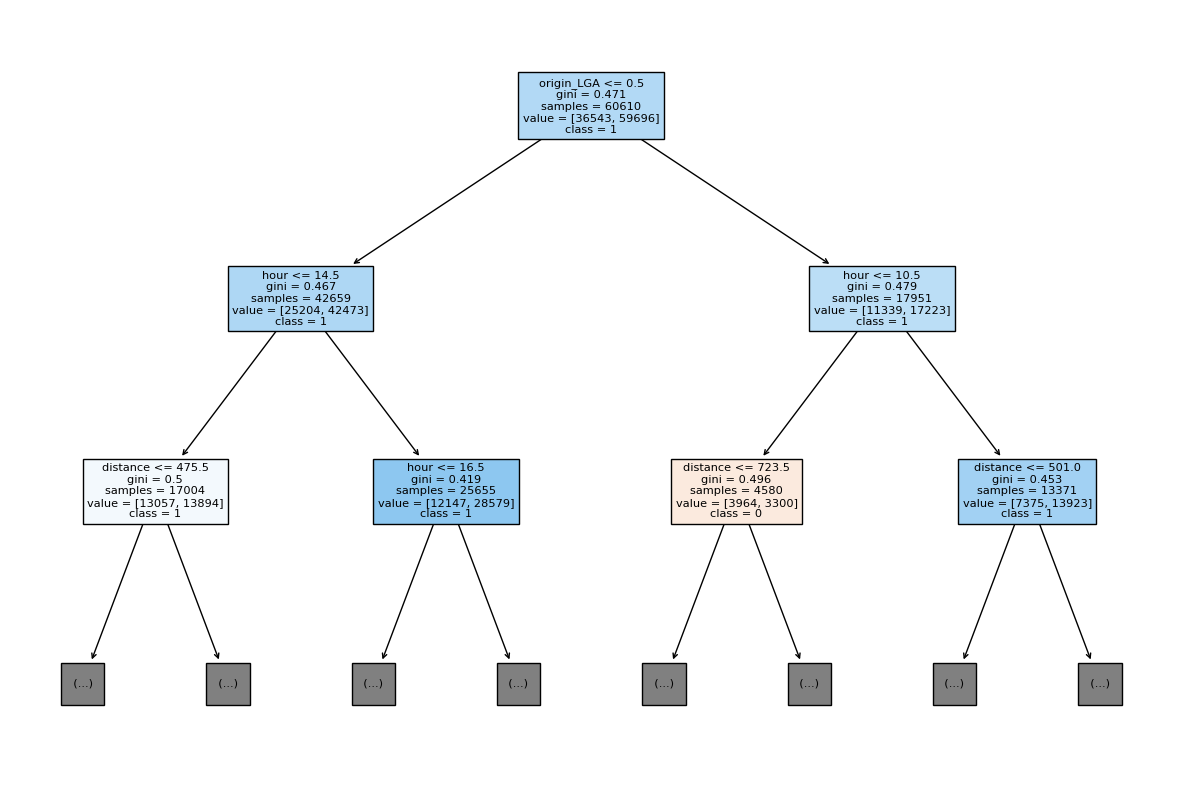

In [137]:
# create a list with names of predictors, and an array with target categories for plotting
delay_pred_names = list(delay_pred_test)
delay_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
tree = plot_tree(model_3.estimators_[32], # Pull out one tree from the forest
          max_depth = 2, # will freeze if we try plot all of it!
          feature_names = delay_pred_names,
          class_names = delay_resp_names, 
          filled=True);
tree

In [18]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

In [42]:
delay_pred_names = list(delay_pred_test)
delay_resp_names = ['0', '1']

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = delay_pred_names,class_names=delay_resp_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

KeyboardInterrupt: 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.externals.six (from versions: none)
ERROR: No matching distribution found for sklearn.externals.six


In [92]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None, 
                                #feature_names=flights.feature_names, 
                                #class_names=flights.dep_delay_10,  
                                filled=True, rounded=True,  
                                special_characters=True) 

In [94]:
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

# Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [139]:
model_2 = LogisticRegression()
model_2.fit(delay_pred_train, delay_resp_train)
scores = cross_val_score(
    model_2, delay_pred_train, delay_resp_train, scoring='accuracy', cv=15
)
scores

C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.64822319, 0.64245636, 0.64027431, 0.63980673, 0.64837905,
       0.64588529, 0.63575436, 0.63076683, 0.64214464, 0.65180798,
       0.63700125, 0.64650873, 0.64292394, 0.64339152, 0.64271239])

In [140]:
print(model_2.score(delay_pred_train, delay_resp_train))
print(np.mean(scores))

0.64225521877825
0.6425357721570326


In [141]:
model_2.score(delay_pred_test, delay_resp_test)

0.642809642560266

In [142]:
pred_test = model_2.predict_proba(delay_pred_test)
pred_test

array([[0.2428272 , 0.7571728 ],
       [0.39023023, 0.60976977],
       [0.50642039, 0.49357961],
       ...,
       [0.29199587, 0.70800413],
       [0.26798528, 0.73201472],
       [0.39539417, 0.60460583]])

In [143]:
#I just want the probabilities of the positive outcome 
pred_test = pred_test[:, 1]
pred_test

array([0.7571728 , 0.60976977, 0.49357961, ..., 0.70800413, 0.73201472,
       0.60460583])

In [144]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = delay_resp_test, y_score = pred_test)

0.6501248375277131